# 🔵 **Processo Seletivo da Stepps**

*Vaga de Estágio em Visão Computacional*

In [81]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import random
import math
import matplotlib as plt
import seaborn as sns

## 🔷 PARTE 1

###🔹Primeiro Ponto

In [83]:
lista_inteiros = []         # Criando uma lista
for i in range(20):
  lista_inteiros.append(np.random.randint(1,100))     # Adicionando 20 números aleatórios à lista

print('A lista é formada pelos seguintes números aleatórios: {}'.format(lista_inteiros))
lista_inteiros.sort()
print('O maior número da lista é {}'.format(lista_inteiros[len(lista_inteiros)-1]))

A lista é formada pelos seguintes números aleatórios: [80, 75, 7, 64, 37, 10, 67, 90, 59, 43, 60, 64, 29, 58, 42, 92, 95, 2, 6, 86]
O maior número da lista é 95


###🔹Segundo Ponto

In [84]:
# É palíndromo?
def ehPalindromo(palavra):
  palavra = palavra.casefold() # Em nosso exemplo, optei por uma abordagem case-insensitive
  tam = len(palavra)//2
  for i in range(tam):
      if palavra[i] != palavra[len(palavra) - (1+i)]:
        return False
  return True

palavra = input("Digite uma palavra: ")
if ehPalindromo(palavra):
  print("A palavra {} é um palíndromo!".format(palavra))
else: print("A palavra {} não é um palíndromo!".format(palavra))


Digite uma palavra: Ana
A palavra Ana é um palíndromo!


###🔹 Terceiro Ponto

In [91]:
soma_impares = 0 #Fazer um pouco melhor

with open('numeros.csv', 'r') as arquivo_csv:
    linhas = arquivo_csv.readlines()

    for linha in linhas:
        numeros = linha.strip().split(',')

        for numero_str in numeros:
            numero = int(numero_str)
            if numero % 2 != 0: 
                soma_impares = numero + soma_impares

print("A soma dos números ímpares é:", soma_impares)


A soma dos números ímpares é: 595


## 🔷 PARTE 2

In [2]:
#Importando o dataset
data = pd.read_csv('Crash_Data.csv')
data.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38.0,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28.0,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19.0,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23.0,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46.0,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [3]:
print("O tamanho do nosso dataset é: {}".format(data.shape))

O tamanho do nosso dataset é: (15042, 23)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Crash ID                       15042 non-null  int64  
 1   State                          15042 non-null  object 
 2   Month                          15042 non-null  int64  
 3   Year                           15042 non-null  int64  
 4   Dayweek                        15042 non-null  object 
 5   Time                           15041 non-null  object 
 6   Crash Type                     15042 non-null  object 
 7   Bus Involvement                15020 non-null  object 
 8   Heavy Rigid Truck Involvement  15019 non-null  object 
 9   Articulated Truck Involvement  15020 non-null  object 
 10  Speed Limit                    14900 non-null  object 
 11  Road User                      15041 non-null  object 
 12  Gender                         15029 non-null 

In [5]:
data.isnull().sum() # We have a lot of values that are NaN/Null, what can we do with them? Are they necessary?

Crash ID                            0
State                               0
Month                               0
Year                                0
Dayweek                             0
Time                                1
Crash Type                          0
Bus Involvement                    22
Heavy Rigid Truck Involvement      23
Articulated Truck Involvement      22
Speed Limit                       142
Road User                           1
Gender                             13
Age                                 1
National Remoteness Areas        8164
SA4 Name 2016                    8150
National LGA Name 2017           8149
National Road Type               8165
Christmas Period                    1
Easter Period                       1
Age Group                          15
Day of week                         1
Time of day                         1
dtype: int64

In [6]:
for col in data:
    print('{}:::{}'.format(col,data[col].unique()))

Crash ID:::[20212133 20214022 20212096 ... 20092073 20097015 20092104]
State:::['Vic' 'SA' 'Qld' 'WA' 'NSW' 'NT' 'ACT' 'Tas']
Month:::[ 9  8  7  6  5  4  3  2  1 12 11 10]
Year:::[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009]
Dayweek:::['Sunday' 'Saturday' 'Thursday' 'Wednesday' 'Friday' 'Tuesday' 'Monday']
Time:::['0:30' '23:31' '23:00' ... '19:43' '5:43' '16:32']
Crash Type:::['Single' 'Multiple']
Bus Involvement:::[nan 'No' 'Yes']
Heavy Rigid Truck Involvement:::[nan 'No' 'Yes']
Articulated Truck Involvement:::[nan 'No' 'Yes']
Speed Limit:::[nan '110' '100' '60' '80' '50' '70' '90' '40' '130' '20' '10' '30' '25'
 '15' '<40' '5' 'Unspecified' '75']
Road User:::['Motorcycle rider' 'Pedestrian' 'Passenger' 'Driver' 'Other/-9'
 'Pedal cyclist' 'Motorcycle pillion passenger' nan]
Gender:::['Male' 'Female' nan 'Unspecified']
Age:::[ 38.  28.  19.  23.  46.  20.  17.   2.  47.  24.  52.  49.  32.  34.
  26.  56.  11.  45.  61.  36.  71.  15.  27.  31.  86.  37.  58.  22

### 🔹 Primeiro Ponto

**Descrição do que é requerido:** Forneça a média de idade das pessoas que morreram em acidentes de
trânsito na Austrália no ano de 2021, em relação ao gênero (Gender)
masculino e feminino.

In [52]:
# O que precisamos para essa requisição? Nosso dataframe é vasto, logo, podemos recortá-los para melhorar a visualização e entendimento dos dados.
# A seguir, vamos selecionar algumas colunas
df = pd.DataFrame()
df = data.copy()
df = data[['Crash ID','Year','Gender','Age Group', 'Age']]
rowsNotDuplicated = df['Crash ID'].value_counts().sum()
if(rowsNotDuplicated == df.shape[0]):
  print('Não temos registros de acidentes duplicados!')
  df = df.drop(['Crash ID'], axis=1)

Não temos registros de acidentes duplicados!


In [53]:
df.head(2) # Temos, agora, um recorte bastante objetivo do nosso problema.

,Year,Gender,Age Group,Age
0,2021,Male,26_to_39,38.0
1,2021,Female,26_to_39,28.0


In [54]:
df_2021 = pd.DataFrame()
df_2021 = df[df["Year"] > 2020] # Apenas o ano de 2021 no nosso dataset
df_2021

,Year,Gender,Age Group,Age
0,2021,Male,26_to_39,38.0
1,2021,Female,26_to_39,28.0
2,2021,Male,17_to_25,19.0
3,2021,Male,17_to_25,23.0
4,2021,Male,40_to_64,46.0
...,...,...,...,...
838,2021,Male,26_to_39,31.0
839,2021,Male,40_to_64,49.0
840,2021,Female,75_or_older,75.0
841,2021,Female,65_to_74,68.0


In [55]:
# Com isso, podemos retirar também a coluna referente ao ano, pois ela se torna redundante.
df_2021_perGender = pd.DataFrame()
df_2021_perGender = df_2021.drop(['Year'], axis=1) # Apenas o ano de 2021 no nosso dataset
df_2021_perGender

,Gender,Age Group,Age
0,Male,26_to_39,38.0
1,Female,26_to_39,28.0
2,Male,17_to_25,19.0
3,Male,17_to_25,23.0
4,Male,40_to_64,46.0
...,...,...,...
838,Male,26_to_39,31.0
839,Male,40_to_64,49.0
840,Female,75_or_older,75.0
841,Female,65_to_74,68.0


<Axes: ylabel='Gender,Age Group'>

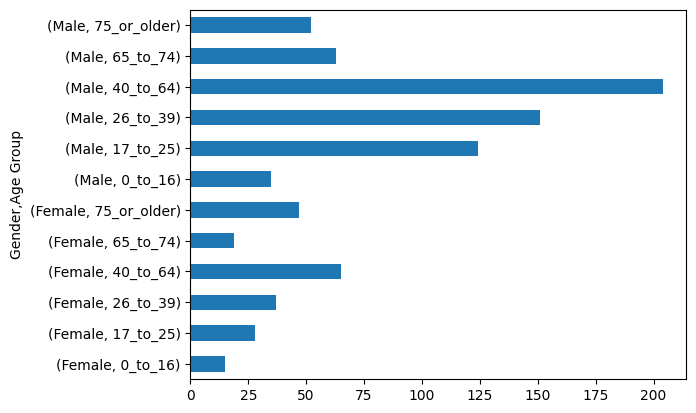

In [57]:
# Passamos agora para a parte de visualização dos nossos dados e construção dos nossos resultados.
# Podemos fazer a análise do ponto de vista das idades agrupadas e das idades exatas

#Vamos entender, primeiro, o tamanho das nossas combinações de grupos existentes
df_sizeGrouped = df_2021_perGender.groupby(["Gender", "Age Group"]).size()
df_sizeGrouped.plot(kind ='barh')

In [ ]:
# Passamos agora para a parte de visualização dos nossos dados e construção dos nossos resultados.
# Podemos fazer a análise do ponto de vista das idades agrupadas e das idades exatas


mean_male = 
mean_female = 
mean_nan = 

IndexError: ignored

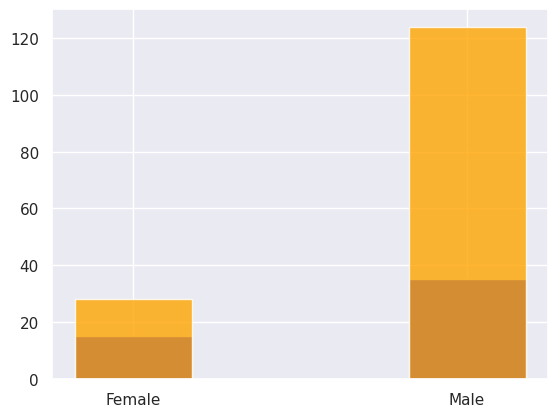